In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline



In [3]:
df = pd.read_excel (r'E:\test1.xlsx', sheet_name='Sheet1')
df.head()

,tournament_id,game_id,inning,batting_team,bowling_team,over_num,ball_num,stage,bowler,bowler_num,...,LegByes_runs,Byes_runs,Bat_runs,Balls_faced,batsman_id,bowler_id,scoring,boundary,batsman_ball,scoring_id
0,1,1,1,ACCENTURE,ROYAL ENFIELD,1,1,powerplay,Senthil Nathan,1,...,0,0,1,1,1_Suresh,1_Senthil Nathan,strike rotation,NaN,Suresh1,2
1,1,1,1,ACCENTURE,ROYAL ENFIELD,1,2,powerplay,Senthil Nathan,1,...,0,0,0,1,2_Ajay Narayanan,1_Senthil Nathan,dot ball,NaN,AjayNarayanan1,1
2,1,1,1,ACCENTURE,ROYAL ENFIELD,1,3,powerplay,Senthil Nathan,1,...,0,0,4,2,2_Ajay Narayanan,1_Senthil Nathan,boundaries,four,AjayNarayanan2,4
3,1,1,1,ACCENTURE,ROYAL ENFIELD,1,4,powerplay,Senthil Nathan,1,...,0,0,0,3,2_Ajay Narayanan,1_Senthil Nathan,dot ball,NaN,AjayNarayanan3,1
4,1,1,1,ACCENTURE,ROYAL ENFIELD,1,4,powerplay,Senthil Nathan,1,...,0,0,3,2,1_Suresh,1_Senthil Nathan,aggressive running,NaN,Suresh2,3


In [4]:
df.isnull().sum()

tournament_id        0
game_id              0
inning               0
batting_team         0
bowling_team         0
over_num             0
ball_num             0
stage                0
bowler               0
bowler_num           0
batsman              0
batsman_num          0
howout               0
wide_runs            0
noball               0
noball_bat_runs      0
LegByes_runs         0
Byes_runs            0
Bat_runs             0
Balls_faced          0
batsman_id           0
bowler_id            0
scoring              0
boundary           171
batsman_ball         0
scoring_id           0
dtype: int64

In [5]:
test_df = df

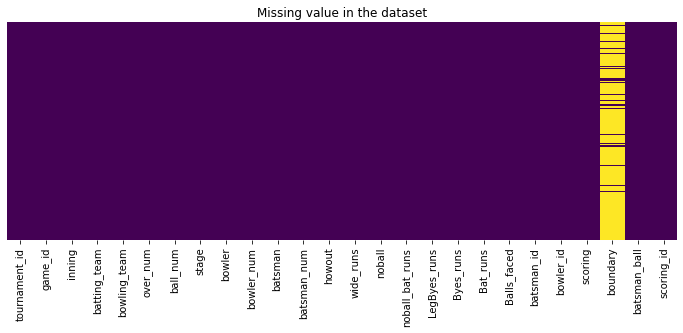

In [6]:
plt.figure(figsize=(12,4))
sns.heatmap(test_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tournament_id    191 non-null    int64 
 1   game_id          191 non-null    int64 
 2   inning           191 non-null    int64 
 3   batting_team     191 non-null    object
 4   bowling_team     191 non-null    object
 5   over_num         191 non-null    int64 
 6   ball_num         191 non-null    int64 
 7   stage            191 non-null    object
 8   bowler           191 non-null    object
 9   bowler_num       191 non-null    int64 
 10  batsman          191 non-null    object
 11  batsman_num      191 non-null    int64 
 12  howout           191 non-null    object
 13  wide_runs        191 non-null    int64 
 14  noball           191 non-null    int64 
 15  noball_bat_runs  191 non-null    int64 
 16  LegByes_runs     191 non-null    int64 
 17  Byes_runs        191 non-null    in

In [8]:
test_df['boundary'].value_counts()

four    18
six      2
Name: boundary, dtype: int64

In [9]:
test_df=test_df.replace({"boundary":{"six":"6","four":"4",np.nan:0}})

In [10]:
test_df['boundary'] = test_df['boundary'].astype(int)

In [11]:
test_df['stage'].value_counts()

middle       95
powerplay    59
death        37
Name: stage, dtype: int64

In [12]:
test_df=test_df.replace({"stage":{"powerplay":"1","middle":"2","death":"3",np.nan:0}})

In [13]:
test_df['stage'] = test_df['stage'].astype(int)

In [14]:
test_df['wickets'] = test_df['howout']

In [15]:
test_df['wickets'].value_counts()

notout     181
Catch        6
RunOut       2
Bowled       1
Stumped      1
Name: wickets, dtype: int64

In [16]:
test_df=test_df.replace({"wickets":{"notout":"0","Catch":"1","RunOut":"1","Bowled":"1","Stumped":"1",np.nan:0}})

In [17]:
test_df['wickets'] = test_df['wickets'].astype(int)

In [18]:
test_df['howout'].value_counts()

notout     181
Catch        6
RunOut       2
Bowled       1
Stumped      1
Name: howout, dtype: int64

In [19]:
test_df=test_df.replace({"howout":{"notout":"0","Catch":"1","RunOut":"2","Bowled":"3","Stumped":"4",np.nan:0}})

In [20]:
test_df['howout'] = test_df['howout'].astype(int)

In [21]:
test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tournament_id    191 non-null    int64 
 1   game_id          191 non-null    int64 
 2   inning           191 non-null    int64 
 3   batting_team     191 non-null    object
 4   bowling_team     191 non-null    object
 5   over_num         191 non-null    int64 
 6   ball_num         191 non-null    int64 
 7   stage            191 non-null    int32 
 8   bowler           191 non-null    object
 9   bowler_num       191 non-null    int64 
 10  batsman          191 non-null    object
 11  batsman_num      191 non-null    int64 
 12  howout           191 non-null    int32 
 13  wide_runs        191 non-null    int64 
 14  noball           191 non-null    int64 
 15  noball_bat_runs  191 non-null    int64 
 16  LegByes_runs     191 non-null    int64 
 17  Byes_runs        191 non-null    in

,tournament_id,game_id,inning,batting_team,bowling_team,over_num,ball_num,stage,bowler,bowler_num,...,Byes_runs,Bat_runs,Balls_faced,batsman_id,bowler_id,scoring,boundary,batsman_ball,scoring_id,wickets
0,1,1,1,ACCENTURE,ROYAL ENFIELD,1,1,1,Senthil Nathan,1,...,0,1,1,1_Suresh,1_Senthil Nathan,strike rotation,0,Suresh1,2,0
1,1,1,1,ACCENTURE,ROYAL ENFIELD,1,2,1,Senthil Nathan,1,...,0,0,1,2_Ajay Narayanan,1_Senthil Nathan,dot ball,0,AjayNarayanan1,1,0
2,1,1,1,ACCENTURE,ROYAL ENFIELD,1,3,1,Senthil Nathan,1,...,0,4,2,2_Ajay Narayanan,1_Senthil Nathan,boundaries,4,AjayNarayanan2,4,0
3,1,1,1,ACCENTURE,ROYAL ENFIELD,1,4,1,Senthil Nathan,1,...,0,0,3,2_Ajay Narayanan,1_Senthil Nathan,dot ball,0,AjayNarayanan3,1,0
4,1,1,1,ACCENTURE,ROYAL ENFIELD,1,4,1,Senthil Nathan,1,...,0,3,2,1_Suresh,1_Senthil Nathan,aggressive running,0,Suresh2,3,0


In [22]:
columns_to_remove = ['tournament_id', 'game_id', 'inning', 'bowler','batsman','batsman_id','bowler_id','scoring','batsman_ball']
test_df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [23]:
test_df["Overs"] = test_df['over_num'].map(str) + '.' + test_df['ball_num'].map(str)

In [24]:
test_df['Overs'] = test_df['Overs'].astype(float)

In [25]:
df = test_df['wide_runs']+test_df['noball']+test_df['Byes_runs']+test_df['Bat_runs']+test_df['LegByes_runs']
test_df["runs"] = df.cumsum()
test_df['runs'].head()

0     1
1     1
2     5
3     7
4    10
Name: runs, dtype: int64

In [26]:
test_df.head()

,batting_team,bowling_team,over_num,ball_num,stage,bowler_num,batsman_num,howout,wide_runs,noball,noball_bat_runs,LegByes_runs,Byes_runs,Bat_runs,Balls_faced,boundary,scoring_id,wickets,Overs,runs
0,ACCENTURE,ROYAL ENFIELD,1,1,1,1,1,0,0,0,0,0,0,1,1,0,2,0,1.1,1
1,ACCENTURE,ROYAL ENFIELD,1,2,1,1,2,0,0,0,0,0,0,0,1,0,1,0,1.2,1
2,ACCENTURE,ROYAL ENFIELD,1,3,1,1,2,0,0,0,0,0,0,4,2,4,4,0,1.3,5
3,ACCENTURE,ROYAL ENFIELD,1,4,1,1,2,0,2,0,0,0,0,0,3,0,1,0,1.4,7
4,ACCENTURE,ROYAL ENFIELD,1,4,1,1,1,0,0,0,0,0,0,3,2,0,3,0,1.4,10


In [27]:
# saving the dataframe
#test_df.to_csv(r'E:Flask_dataset\updatedFile1.csv',index=False)

In [28]:
pred_df = test_df

In [29]:
pred_df.columns

Index(['batting_team', 'bowling_team', 'over_num', 'ball_num', 'stage',
       'bowler_num', 'batsman_num', 'howout', 'wide_runs', 'noball',
       'noball_bat_runs', 'LegByes_runs', 'Byes_runs', 'Bat_runs',
       'Balls_faced', 'boundary', 'scoring_id', 'wickets', 'Overs', 'runs'],
      dtype='object')

In [30]:
pred_df = pred_df[['batting_team', 'bowling_team','wickets', 'Overs', 'runs']]

In [31]:
selected_column = pred_df[['runs']]
pred_df['runs_last_5'] =selected_column.copy()



C:\Users\SIVASA~1\AppData\Local\Temp/ipykernel_13700/4015694832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['runs_last_5'] =selected_column.copy()


In [32]:
selected_column = pred_df[['wickets']]
pred_df['wickets_last_5'] =selected_column.copy()

C:\Users\SIVASA~1\AppData\Local\Temp/ipykernel_13700/434841877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['wickets_last_5'] =selected_column.copy()


In [33]:
# Removing the first 5 overs data in every match
df = pred_df[pred_df['Overs']>=5.0]

In [34]:
df.head()

,batting_team,bowling_team,wickets,Overs,runs,runs_last_5,wickets_last_5
26,ACCENTURE,ROYAL ENFIELD,0,5.1,30,30,0
27,ACCENTURE,ROYAL ENFIELD,0,5.1,34,34,0
28,ACCENTURE,ROYAL ENFIELD,0,5.2,34,34,0
29,ACCENTURE,ROYAL ENFIELD,0,5.3,34,34,0
30,ACCENTURE,ROYAL ENFIELD,0,5.4,35,35,0


In [35]:
encoded_df = pd.get_dummies(data=df, columns=['batting_team', 'bowling_team'])

In [36]:
encoded_df.head()

,wickets,Overs,runs,runs_last_5,wickets_last_5,batting_team_ACCENTURE,bowling_team_ROYAL ENFIELD
26,0,5.1,30,30,0,1,1
27,0,5.1,34,34,0,1,1
28,0,5.2,34,34,0,1,1
29,0,5.3,34,34,0,1,1
30,0,5.4,35,35,0,1,1


In [37]:
encoded_df.columns

Index(['wickets', 'Overs', 'runs', 'runs_last_5', 'wickets_last_5',
       'batting_team_ACCENTURE ', 'bowling_team_ROYAL ENFIELD'],
      dtype='object')

In [38]:
encoded_df=encoded_df[['batting_team_ACCENTURE ', 'bowling_team_ROYAL ENFIELD','Overs','wickets','runs_last_5', 'wickets_last_5','runs']]

In [39]:
encoded_df.head()

,batting_team_ACCENTURE,bowling_team_ROYAL ENFIELD,Overs,wickets,runs_last_5,wickets_last_5,runs
26,1,1,5.1,0,30,0,30
27,1,1,5.1,0,34,0,34
28,1,1,5.2,0,34,0,34
29,1,1,5.3,0,34,0,34
30,1,1,5.4,0,35,0,35


In [40]:
# saving the dataframe
#encoded_df.to_csv(r'E:Flask_dataset\updatedFile2.csv',index=False)

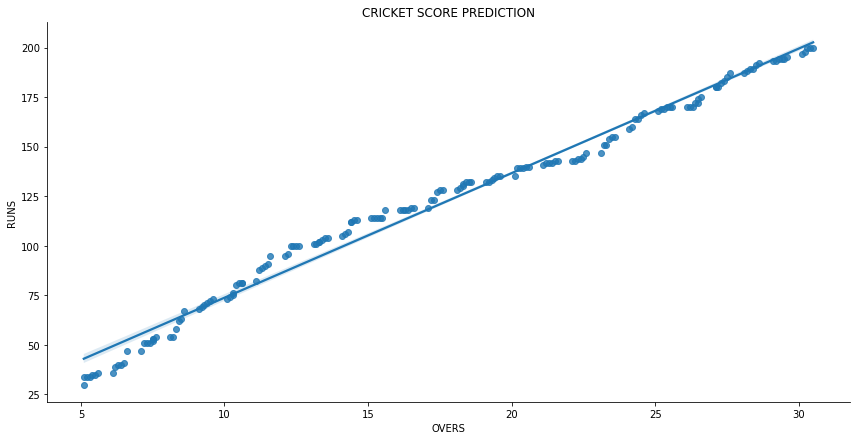

In [41]:
sns.lmplot(x='Overs',y='runs',data=df,aspect=2,height=6)
plt.xlabel('OVERS')
plt.ylabel('RUNS')
plt.title('CRICKET SCORE PREDICTION');

In [42]:
encoded_df.describe()

,batting_team_ACCENTURE,bowling_team_ROYAL ENFIELD,Overs,wickets,runs_last_5,wickets_last_5,runs
count,165.0,165.0,165.000000,165.000000,165.000000,165.000000,165.000000
mean,1.0,1.0,17.543030,0.054545,121.218182,0.054545,121.218182
std,0.0,0.0,7.522732,0.227782,47.620076,0.227782,47.620076
min,1.0,1.0,5.100000,0.000000,30.000000,0.000000,30.000000
25%,1.0,1.0,11.100000,0.000000,82.000000,0.000000,82.000000
50%,1.0,1.0,17.400000,0.000000,127.000000,0.000000,127.000000
75%,1.0,1.0,24.200000,0.000000,160.000000,0.000000,160.000000
max,1.0,1.0,30.500000,1.000000,200.000000,1.000000,200.000000


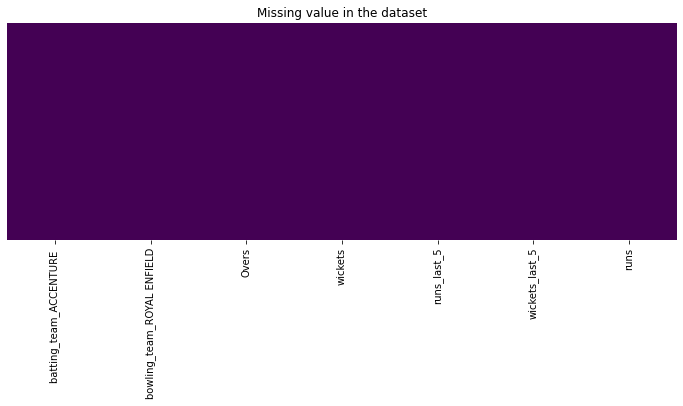

In [43]:
plt.figure(figsize=(12,4))
sns.heatmap(encoded_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

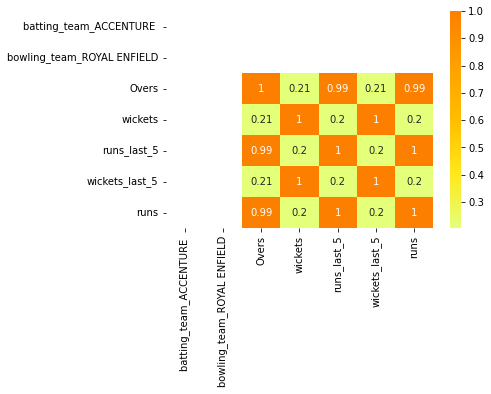

In [44]:
# correlation plot
corr = encoded_df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [45]:
from sklearn.model_selection import train_test_split
X = encoded_df.drop('runs',axis=1) # Independet variable
y = encoded_df['runs'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [46]:
type(X_test)

pandas.core.frame.DataFrame

In [47]:
type(y)


pandas.core.series.Series

In [48]:
# --- Model Building ---
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [56]:
regressor.predict([[1,1,50.6,5,100,1]])

array([100.])

In [ ]:
len(X_test)

In [ ]:
regressor.score(X_test,y_test)

In [ ]:
# Creating a pickle file for the classifier
#filename = 'predictions.pkl'
#pickle.dump(regressor, open(filename, 'wb'))